In [0]:
%matplotlib inline
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [0]:
import urllib
import re
#found on UCI database.
feature_names = '''1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
     20 ekgmo (month of exercise ECG reading)
     21 ekgday (day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease 
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used '''
name_cols = []
for line in feature_names.split('\n'):
    name_cols.append(line.strip().split()[1].strip(': '))
    
file1=io.TextIOWrapper(urllib.request.urlopen(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'),encoding='ISO-8859-1')

outer_list = []
inner_list = []

In [68]:
for line in file1:
        quantities = re.split('[^0-9.name-]+',line.strip())
        for x in quantities:
            if x!='name':
                inner_list.append(x)
            else:
                outer_list.append(inner_list)
                inner_list=[]
print(len(outer_list))
removeable_rows = sorted([i for i,row in enumerate(outer_list) if len(row)!=75],reverse=True)
for i in removeable_rows:
    del outer_list[i]
df = pd.DataFrame(outer_list,columns=name_cols)

for column in df.columns:
    try:
        df[column]=df[column].astype(int)
    except:
        df[column]=df[column].astype(float)
df = df.applymap(lambda x: np.NaN if x==-9 else x)

df = df[df.columns[:58]]

293


**Filter Data Attributes**

In [69]:
for feat in ['id','ccf','ekgday','ekgmo','ekgyr','proto','dummy','restckm','exerckm',
             'thalsev','thalpul','earlobe','cmo','cday','cyr']:
    del df[feat]
    
df['num'] = df['num'].astype(bool).astype(int)
# The "num" field refers to the presence of heart disease in the patient. 
# It is integer valued from 0 (no presence) to 4. 
# To only distinguish presense of CHD, change all non-zero to 1.

for column in df.columns:
    if len(np.unique(df[column].dropna()))<2:
        print(column)
        del df[column]
        
print('\n')
        
for feat in df.columns:
    #if the column is mostly empty na values, drop it
    if df[feat].dropna().size<df[feat].size/2:
        print(feat)
        del df[feat]

painloc
painexer
relrest
pncaden
smoke
dm
rldv5
restef
restwm
exeref
exerwm




In [70]:
for column in df.columns:
    if len(np.unique(df[column].dropna().values))<10:
        print('{}: {}'.format(column,np.unique(df[column].dropna().values)))

sex: [0 1]
cp: [1 2 3 4]
htn: [0 1]
fbs: [0 1]
famhist: [0 1]
restecg: [0 1 2]
dig: [0. 1.]
prop: [0. 1.]
nitr: [0. 1.]
pro: [0. 1.]
diuretic: [0. 1.]
exang: [0 1]
xhypo: [0 1]
slope: [1 2 3]
ca: [0. 1. 2. 3.]
thal: [3. 6. 7.]
num: [0 1]


In [0]:
df = df.dropna(subset=['cigs', 'years', 'dig', 'ca', 'thal'])
del df['thaltime']

df = pd.get_dummies(df, columns=['cp','restecg', 'slope', 'thal'])

df = df.rename(columns={'num': 'target'})

# **Data Visualisation**

In [0]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

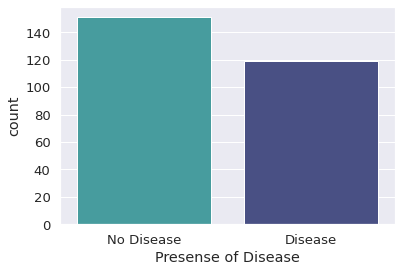

In [73]:
sns.set(font_scale=1.2)
g0 = sns.countplot(x='target', data=df, palette="mako_r")
g0.set(xlabel = 'Presense of Disease')
g0.set_xticklabels(['No Disease', 'Disease'])
plt.show()

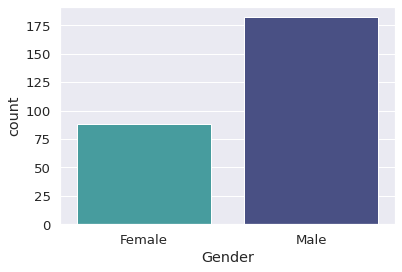

In [74]:
g1 = sns.countplot(x='sex', data=df, palette="mako_r")
g1.set(xlabel = 'Gender')
g1.set_xticklabels(['Female', 'Male'])
plt.show()

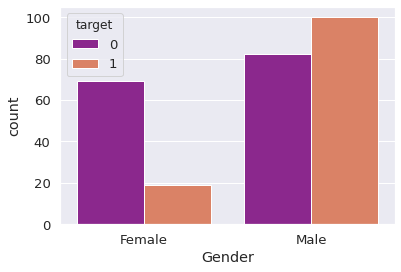

In [75]:
g2 = sns.countplot(x='sex', data=df, hue='target' ,palette="plasma")
g2.set(xlabel='Gender')
g2.set_xticklabels(['Female', 'Male'])
plt.show()

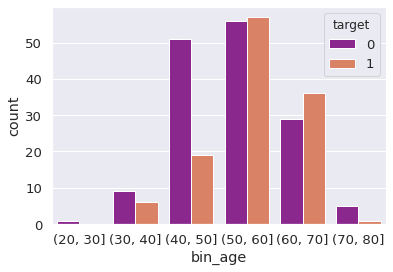

In [76]:
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
g3=sns.countplot(x='bin_age',data=df ,hue='target',palette='plasma')
plt.show()

del df['bin_age']

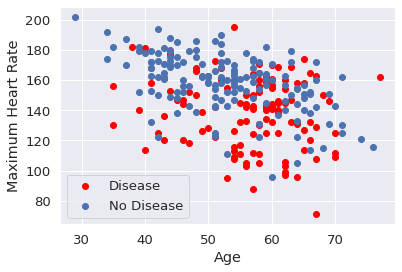

In [77]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

**Data Pre-Processing**

In [0]:
x_data = df.drop(['target'], axis = 1)
y = df.target.values
column_names = df.columns

In [0]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

*Try to use sklearn preprocessing method*

In [0]:
from sklearn import preprocessing
x_preproc = preprocessing.normalize(x_data)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation = train_test_split(x,y, test_size=0.3, random_state=1)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation,y_validation, test_size=0.33, random_state=1)
# 70% train, 20% validation, 10% test for math one.

In [0]:
xp_train,xp_validation,yp_train,yp_validation = train_test_split(x_preproc,y, test_size=0.3, random_state=1)
xp_validation, xp_test, yp_validation, yp_test = train_test_split(xp_validation,yp_validation, test_size=0.33, random_state=1)
# 70% train, 20% validation, 10% test for sklearn one.

# **Classification Methods**

In [0]:
import timeit
accuracies = {}
accuracies_train = {}
time_proc = {}

*Logistic Regression*

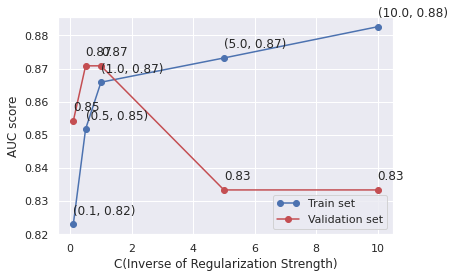

In [157]:
# tuning
from sklearn.metrics import roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
Cs = [0.1, 0.5, 1, 5, 10]
train_results = []
validation_results = []
for c in Cs:
   rf = LogisticRegression(C=c, random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   roc_auc = roc_auc_score(y_validation, y_pred)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Cs, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(Cs, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(Cs,train_results):
    label = '({:.1f}, {:.2f})'.format(x, y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

for x,y in zip(Cs,validation_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=4)
plt.ylabel('AUC score')
plt.xlabel('C(Inverse of Regularization Strength)')
plt.show()

In [86]:
from sklearn.linear_model import LogisticRegression

start = timeit.default_timer()
lr = LogisticRegression(random_state=1, C=1)
print(lr.fit(x_train,y_train))
time_proc['LR'] = timeit.default_timer() - start

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [87]:
acc = lr.score(x_validation,y_validation)*100
accuracies['LR'] = acc
print("Validation Accuracy of Logistic Regression: {:.2f}%".format(acc))

acct = lr.score(x_train,y_train)*100
accuracies_train['LR'] = acct
print("Training Accuracy of Logistic Regression: {:.2f}%".format(acct))


from sklearn.feature_selection import RFE
LRselector = RFE(lr, 1, step=1)
LRselector = LRselector.fit(x_train, y_train)
LRrank = sorted(zip(map(lambda x: round(x, 4), LRselector.ranking_), column_names))
print(*LRrank, sep = "\n") 

Validation Accuracy of Logistic Regression: 87.04%
Training Accuracy of Logistic Regression: 87.30%
(1, 'ca')
(2, 'thalach')
(3, 'thal_6.0')
(4, 'oldpeak')
(5, 'cp_3')
(6, 'sex')
(7, 'dig')
(8, 'restecg_2')
(9, 'pro')
(10, 'exang')
(11, 'slope_3')
(12, 'cp_4')
(13, 'chol')
(14, 'xhypo')
(15, 'famhist')
(16, 'thalrest')
(17, 'trestbps')
(18, 'diuretic')
(19, 'age')
(20, 'cp_2')
(21, 'slope_1')
(22, 'restecg_1')
(23, 'tpeakbps')
(24, 'cigs')
(25, 'target')
(26, 'fbs')
(27, 'met')
(28, 'tpeakbpd')
(29, 'thaldur')
(30, 'prop')
(31, 'rldv5e')
(32, 'thal_3.0')
(33, 'htn')
(34, 'nitr')
(35, 'trestbpd')
(36, 'cp_1')
(37, 'slope_2')
(38, 'years')
(39, 'restecg_0')


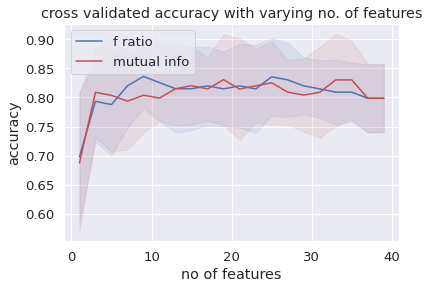

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
for i in range(1,40,2):
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i)),
                ('clf',LogisticRegression(C=1))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',LogisticRegression(C=1))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())
    
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,40,2),results_f,c='b',label='f ratio')
plt.fill_between(range(1,40,2),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,40,2),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,40,2),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.savefig('cv_lr.jpg')
plt.show()

split the data into 10 sets - plus minus std for the average

*Support Vector Machine*

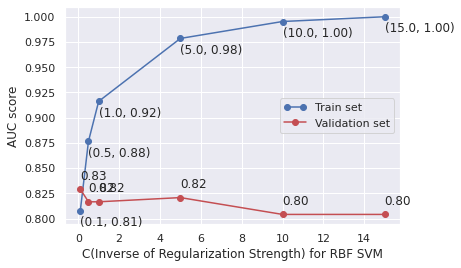

In [178]:
# Tuning
from sklearn.metrics import roc_auc_score, auc
from sklearn.svm import SVC
Cs = [0.1, 0.5, 1, 5, 10, 15]
train_results = []
validation_results = []
for c in Cs:
   rf = SVC(C=c, random_state=1, kernel='rbf')
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   roc_auc = roc_auc_score(y_validation, y_pred)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Cs, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(Cs, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(Cs,train_results):
    label = '({:.1f}, {:.2f})'.format(x, y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

for x,y in zip(Cs,validation_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('C(Inverse of Regularization Strength) for RBF SVM')
plt.show()

In [174]:
print("C with highest AUC score: ", Cs[validation_results.index(max(validation_results))])

C with highest AUC score:  5


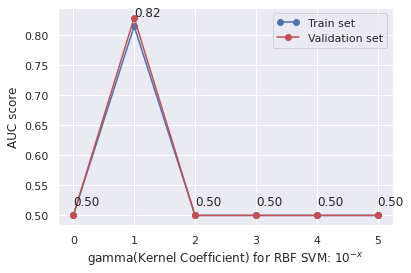

In [260]:
from sklearn.metrics import roc_auc_score, auc

Gammas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
Gammas_loc = [0, 1, 2, 3, 4, 5]
train_results = []
validation_results = []
for g in Gammas:
   rf = SVC(C=0.1, gamma=g, random_state=1, kernel='rbf')
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   roc_auc = roc_auc_score(y_validation, y_pred)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Gammas_loc, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(Gammas_loc, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(Gammas_loc,train_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('gamma(Kernel Coefficient) for RBF SVM: $10^{-x}$')
plt.show()

In [92]:
print("gamma with highest AUC score: ", Gammas[validation_results.index(max(validation_results))])

gamma with highest AUC score:  0.1


In [93]:
from sklearn.svm import SVC

start = timeit.default_timer()
svm = SVC(kernel='linear', random_state=1, C=10)
print(svm.fit(x_train, y_train))
time_proc['SVM'] = timeit.default_timer() - start

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)


In [94]:
acc = svm.score(x_validation,y_validation)*100
accuracies['SVM'] = acc
print("Validation Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acct = svm.score(x_train,y_train)*100
accuracies_train['SVM'] = acct
print("Training Accuracy of SVM Algorithm: {:.2f}%".format(acct))

SVMselector = RFE(svm, 1, step=1)
SVMselector = SVMselector.fit(x_train, y_train)
SVMrank = sorted(zip(map(lambda x: round(x, 4), SVMselector.ranking_), column_names))
print(*SVMrank, sep = "\n") 

Validation Accuracy of SVM Algorithm: 87.04%
Training Accuracy of SVM Algorithm: 91.01%
(1, 'ca')
(2, 'oldpeak')
(3, 'thalach')
(4, 'thal_6.0')
(5, 'dig')
(6, 'sex')
(7, 'xhypo')
(8, 'exang')
(9, 'fbs')
(10, 'cp_3')
(11, 'thaldur')
(12, 'restecg_1')
(13, 'famhist')
(14, 'trestbps')
(15, 'slope_1')
(16, 'met')
(17, 'rldv5e')
(18, 'target')
(19, 'trestbpd')
(20, 'pro')
(21, 'cigs')
(22, 'chol')
(23, 'diuretic')
(24, 'years')
(25, 'cp_1')
(26, 'slope_2')
(27, 'cp_4')
(28, 'tpeakbpd')
(29, 'slope_3')
(30, 'cp_2')
(31, 'thalrest')
(32, 'htn')
(33, 'nitr')
(34, 'age')
(35, 'tpeakbps')
(36, 'thal_3.0')
(37, 'prop')
(38, 'restecg_2')
(39, 'restecg_0')


In [0]:
results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
for i in range(1,40,2):
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i)),
                ('clf',SVC(kernel='linear', C=10))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',SVC(kernel='linear', C=10))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())

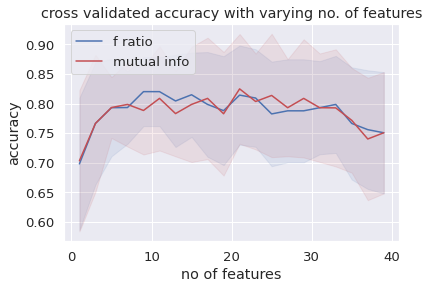

In [96]:
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,40,2),results_f,c='b',label='f ratio')
plt.fill_between(range(1,40,2),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,40,2),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,40,2),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.savefig('cv_svm.jpg')
plt.show()

*Random Forest*

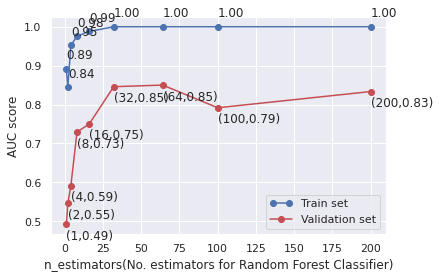

In [187]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(n_estimators,train_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

for x,y in zip(n_estimators,validation_results):
    label = '({:d},{:.2f})'.format(x, y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('n_estimators(No. estimators for Random Forest Classifier)')
plt.show()

In [98]:
print("n_estimators with highest AUC score: ", n_estimators[validation_results.index(max(validation_results))])

n_estimators with highest AUC score:  64


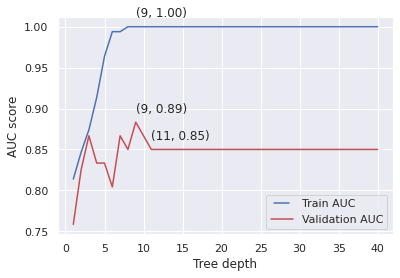

In [273]:
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results = []
validation_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=64, random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, validation_results, 'r', label="Validation AUC")

plt.annotate('(9, 0.89)', (9,validation_results[8]), textcoords="offset points", xytext=(0,10), ha='left')
plt.annotate('(9, 1.00)', (9, train_results[8]), textcoords="offset points", xytext=(0,10), ha='left')
plt.annotate('(11, 0.85)', (11, validation_results[14]), textcoords="offset points", xytext=(0,10), ha='left')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [196]:
print("max_depth with highest AUC score: ", max_depths[validation_results.index(max(validation_results))])

max_depth with highest AUC score:  9.0


In [201]:
validation_results[11]

0.8500000000000001

In [347]:
from sklearn.ensemble import RandomForestClassifier

start = timeit.default_timer()
rf = RandomForestClassifier(n_estimators=64, max_depth=9, random_state=1)
print(rf.fit(x_train, y_train))
time_proc['RF'] = timeit.default_timer() - start

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [348]:
acc = rf.score(x_validation,y_validation)*100
accuracies['RF'] = acc
print("Validation Accuracy of Random Forest Algorithm: {:.2f}%".format(acc))

acct = rf.score(x_train,y_train)*100
accuracies_train['RF'] = acct
print("Training Accuracy of Random Forest Algorithm: {:.2f}%".format(acct))

RFselector = RFE(rf, 1, step=1)
RFselector = RFselector.fit(x_train, y_train)
RFrank = sorted(zip(map(lambda x: round(x, 4), RFselector.ranking_), column_names))
print(*RFrank, sep = "\n") 

Validation Accuracy of Random Forest Algorithm: 88.89%
Training Accuracy of Random Forest Algorithm: 100.00%
(1, 'thalach')
(2, 'chol')
(3, 'oldpeak')
(4, 'ca')
(5, 'slope_3')
(6, 'thaldur')
(7, 'rldv5e')
(8, 'cp_3')
(9, 'thal_6.0')
(10, 'age')
(11, 'tpeakbpd')
(12, 'thalrest')
(13, 'tpeakbps')
(14, 'met')
(15, 'trestbps')
(16, 'trestbpd')
(17, 'sex')
(18, 'cigs')
(19, 'years')
(20, 'exang')
(21, 'restecg_2')
(22, 'cp_2')
(23, 'slope_1')
(24, 'restecg_1')
(25, 'cp_4')
(26, 'famhist')
(27, 'htn')
(28, 'cp_1')
(29, 'pro')
(30, 'prop')
(31, 'dig')
(32, 'nitr')
(33, 'diuretic')
(34, 'target')
(35, 'fbs')
(36, 'slope_2')
(37, 'xhypo')
(38, 'thal_3.0')
(39, 'restecg_0')


In [0]:
results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
for i in range(1,40,2):
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i)),
                ('clf',RandomForestClassifier(n_estimators=64, max_depth=9))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
               ('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',RandomForestClassifier(n_estimators=64, max_depth=9))])
    cv_scores = cross_val_score(pipe,x_train,y_train,cv=10,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())

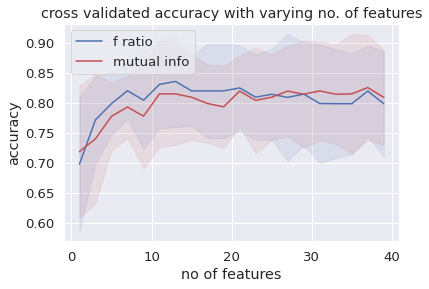

In [104]:
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,40,2),results_f,c='b',label='f ratio')
plt.fill_between(range(1,40,2),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,40,2),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,40,2),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.savefig('cv_svm.jpg')
plt.show()

Visualisation of the Decision Trees

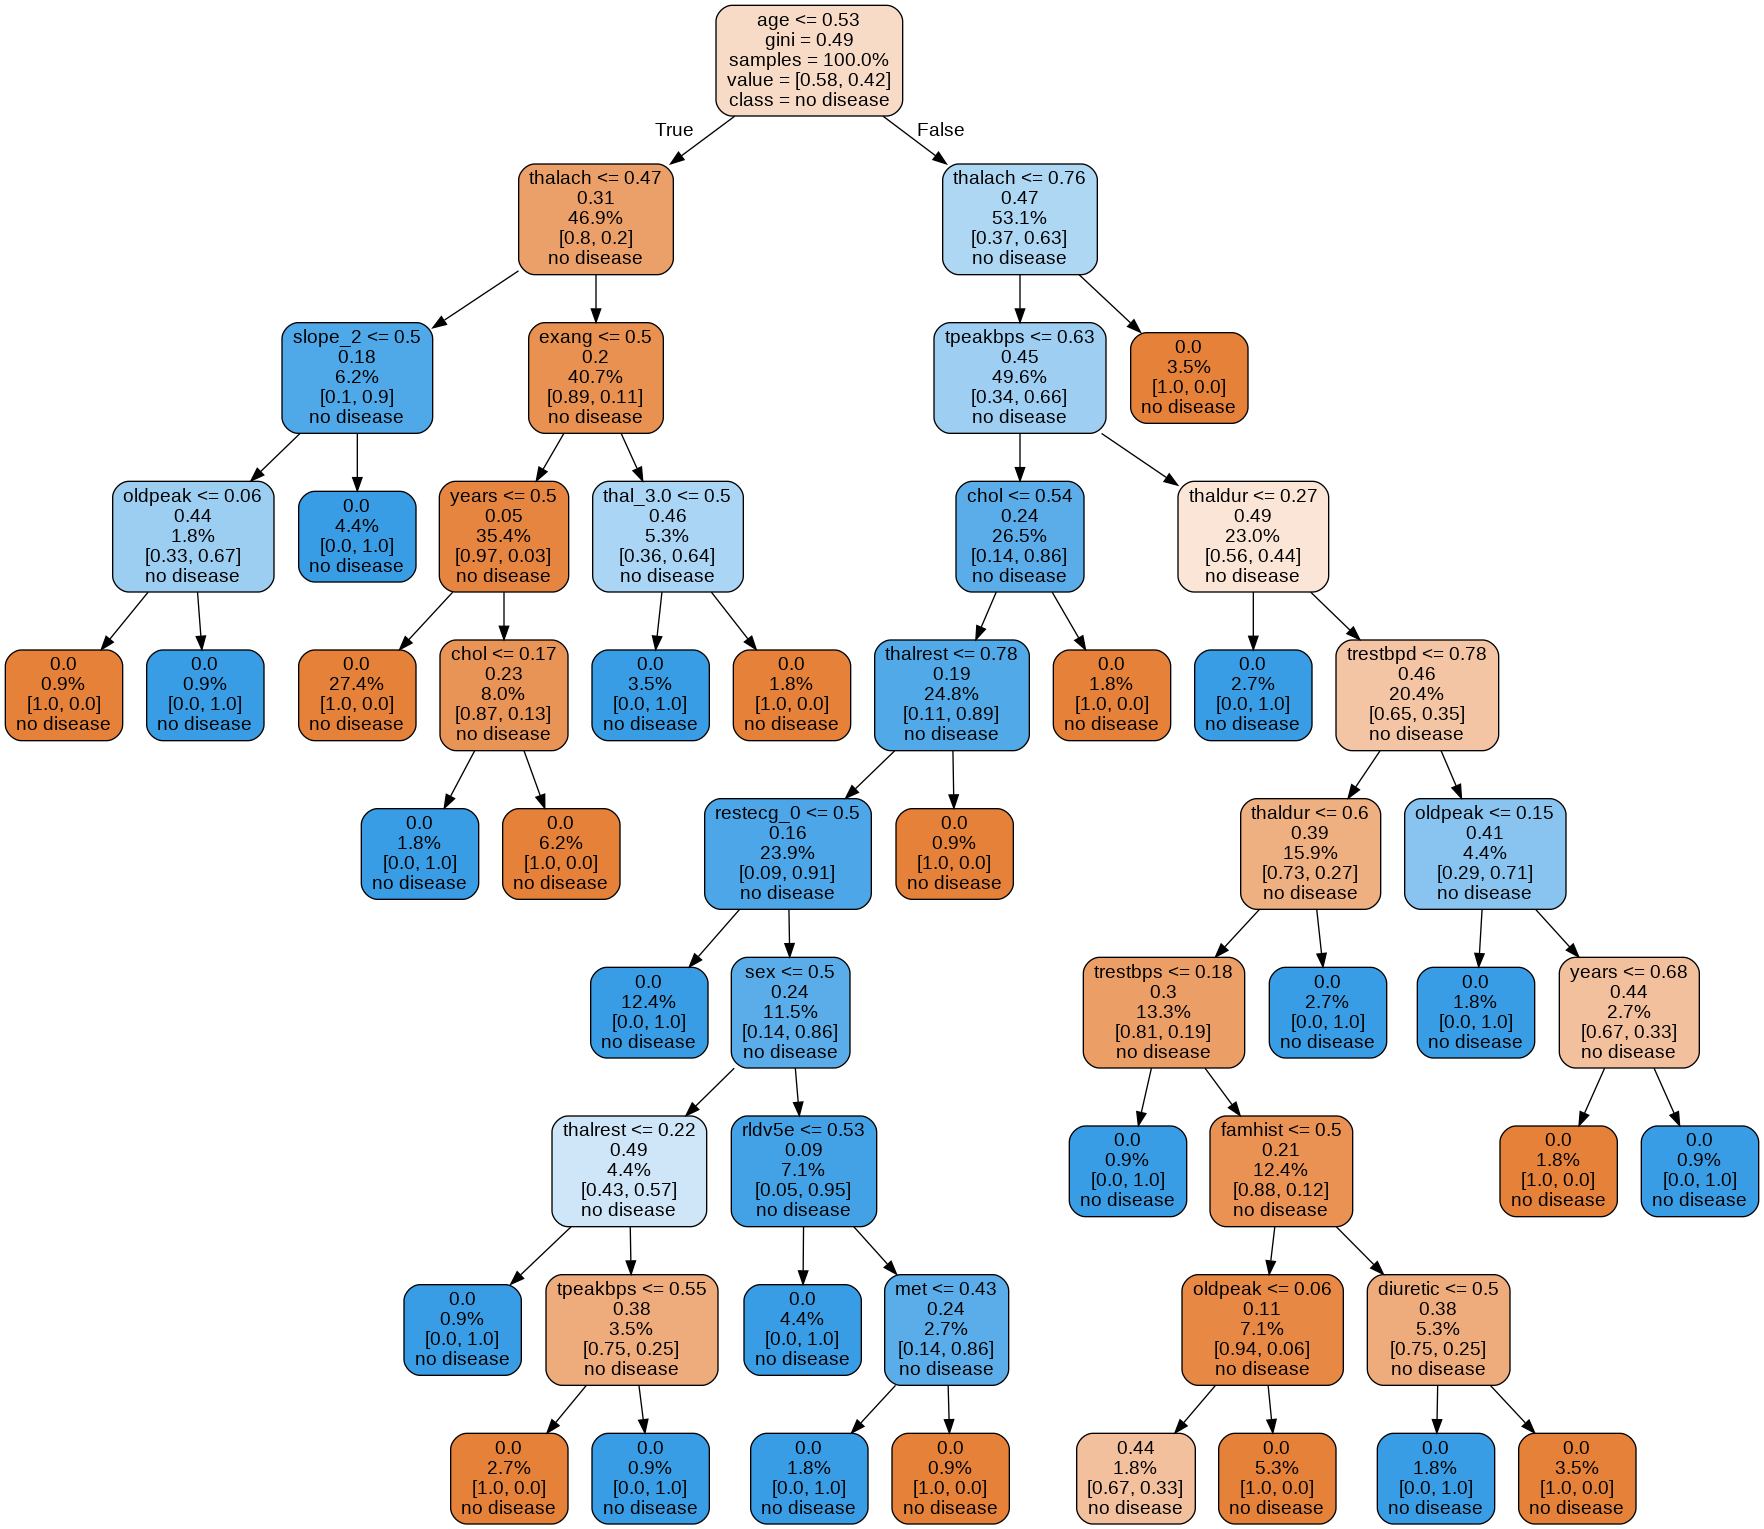

In [105]:
estimator = rf.estimators_[2]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

from sklearn.tree import export_graphviz
dot_data = export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# Draw graph
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
from IPython.display import Image
Image(graph.create_png())

In [106]:
graph.write_png("rf_tree.png")

True

**Neural Network**

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


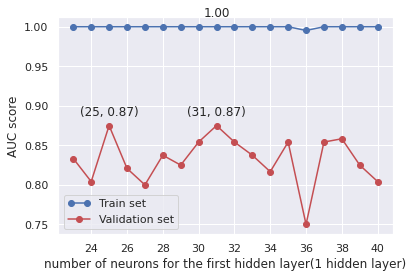

In [316]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='logistic', solver='lbfgs',hidden_layer_sizes=(int(estimator), ), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

plt.annotate('(25, 0.87)', (25, validation_results[2]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(31, 0.87)', (31, validation_results[8]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('1.00', (31, train_results[8]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(1 hidden layer)')
plt.show()

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


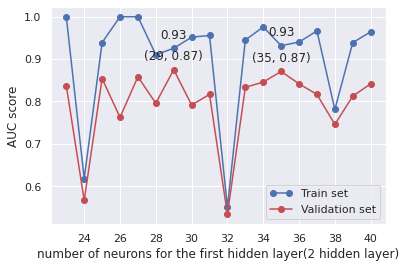

In [317]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='logistic', solver='lbfgs',hidden_layer_sizes=(int(estimator), 1), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

plt.annotate('(29, 0.87)', (29, validation_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.93', (29, train_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(35, 0.87)', (35, validation_results[12]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.93', (35, train_results[12]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=4)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(2 hidden layer)')
plt.show()

In [291]:
validation_results[12]

0.8708333333333333

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


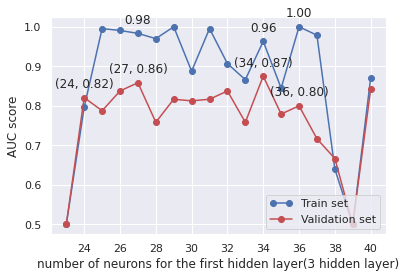

In [318]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='logistic', solver='lbfgs',hidden_layer_sizes=(int(estimator), int(estimator/2), 1), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")


plt.annotate('(24, 0.82)', (24, validation_results[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.98', (27, train_results[4]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(27, 0.86)', (27, validation_results[4]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(34, 0.87)', (34, validation_results[11]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.96', (34, train_results[11]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(36, 0.80)', (36, validation_results[13]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('1.00', (36, train_results[13]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=4)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(3 hidden layer)')
plt.show()

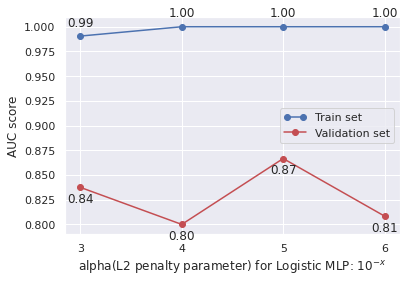

In [271]:
Alphas = [1e-3, 1e-4, 1e-5, 1e-6]
Alphas_loc = [3, 4, 5, 6]
train_results = []
validation_results = []
for a in Alphas:
   rf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=a, hidden_layer_sizes=(36, 18, 1), random_state=1, verbose=3)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Alphas_loc, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(Alphas_loc, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(Alphas_loc,train_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for x,y in zip(Alphas_loc,validation_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('alpha(L2 penalty parameter) for Logistic MLP: $10^{-x}$')
plt.show()

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


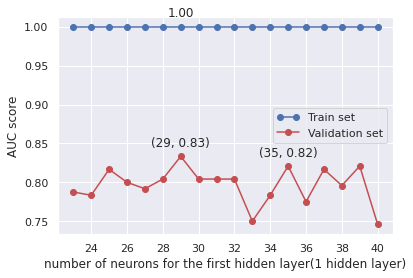

In [319]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='relu', solver='lbfgs',hidden_layer_sizes=(int(estimator), ), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

plt.annotate('(29, 0.83)', (29, validation_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('1.00', (29, train_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(35, 0.82)', (35, validation_results[12]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(1 hidden layer)')
plt.show()

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


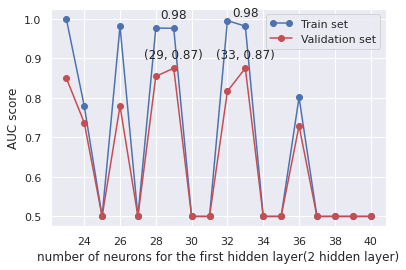

In [334]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='relu', solver='lbfgs',hidden_layer_sizes=(int(estimator), 1), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

plt.annotate('(29, 0.87)', (29, validation_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.98', (29, train_results[6]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(33, 0.87)', (33, validation_results[10]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('0.98', (33, train_results[10]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=0)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(2 hidden layer)')
plt.show()

In [235]:
print("alpha with highest AUC score: ", n_estimators[validation_results.index(max(validation_results))])

alpha with highest AUC score:  34


In [311]:
train_results[10]

0.9811320754716981

[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


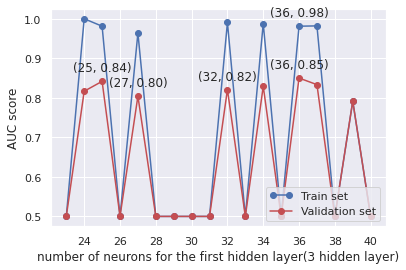

In [321]:
from sklearn.neural_network import MLPClassifier
import matplotlib.ticker as mticker
n_estimators = np.linspace(23, 41, 18, endpoint=False, dtype=int)
print(n_estimators)
train_results = []
validation_results = []
for estimator in n_estimators:
   rf = MLPClassifier(activation='relu', solver='lbfgs',hidden_layer_sizes=(int(estimator), int(estimator/2), 1), random_state=1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(n_estimators, validation_results, 'r', marker='o', label="Validation set")

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))


plt.annotate('(25, 0.84)', (25, validation_results[2]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(27, 0.80)', (27, validation_results[4]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(32, 0.82)', (32, validation_results[9]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(36, 0.85)', (36, validation_results[13]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('(36, 0.98)', (36, train_results[13]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc=4)
plt.ylabel('AUC score')
plt.xlabel('number of neurons for the first hidden layer(3 hidden layer)')
plt.show()

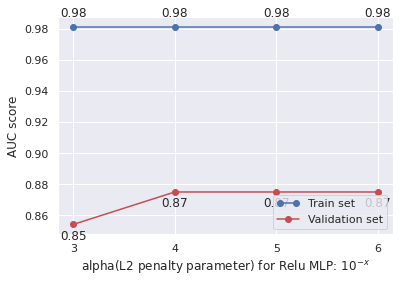

In [335]:
Alphas = [1e-3, 1e-4, 1e-5, 1e-6]
Alphas_loc = [3, 4, 5, 6]
train_results = []
validation_results = []
for a in Alphas:
   rf = MLPClassifier(activation='relu', solver='lbfgs', alpha=a, hidden_layer_sizes=(33, 1), random_state=1, verbose=3)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_validation)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   validation_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Alphas_loc, train_results, 'b', marker='o', label="Train set")
line2, = plt.plot(Alphas_loc, validation_results, 'r', marker='o', label="Validation set")

for x,y in zip(Alphas_loc,train_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for x,y in zip(Alphas_loc,validation_results):
    label = '{:.2f}'.format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('alpha(L2 penalty parameter) for Relu MLP: $10^{-x}$')
plt.show()

In [110]:
print("alpha with highest AUC score: ", n_estimators[validation_results.index(max(validation_results))])

alpha with highest AUC score:  0.0001


In [322]:
from sklearn.neural_network import MLPClassifier

start = timeit.default_timer()
mlp = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(34,17,1), random_state=1)
print(mlp.fit(x_train, y_train))
time_proc['MLP'] = timeit.default_timer() - start

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(34, 17, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [323]:
acc = mlp.score(x_validation,y_validation)*100
accuracies['MLP'] = acc
print("Validation Accuracy of Logistic Multi-Layer Perception: {:.2f}%".format(acc))

acct = mlp.score(x_train,y_train)*100
accuracies_train['MLP'] = acct
print("Training Accuracy of Logistic Multi-Layer Perception: {:.2f}%".format(acct))

Validation Accuracy of Logistic Multi-Layer Perception: 92.59%
Training Accuracy of Logistic Multi-Layer Perception: 95.77%


In [345]:
start = timeit.default_timer()
mlpr = MLPClassifier(hidden_layer_sizes=(33, 1), alpha=1e-4, random_state=1, max_iter=1000)
print(mlpr.fit(x_train, y_train))
time_proc['MLPR'] = timeit.default_timer() - start

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(33, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


In [346]:
acc = mlpr.score(x_validation,y_validation)*100
accuracies['MLPR'] = acc
print("Validation Accuracy of Relu Multi-Layer Perception: {:.2f}%".format(acc))

acct = mlpr.score(x_train,y_train)*100
accuracies_train['MLPR'] = acct
print("Training Accuracy of Relu Multi-Layer Perception: {:.2f}%".format(acct))

Validation Accuracy of Relu Multi-Layer Perception: 81.48%
Training Accuracy of Relu Multi-Layer Perception: 98.41%


# **Model Analysis**

*Sensitivity & Specificity*

In [349]:
from sklearn.metrics import confusion_matrix
sensitivity_spTable = []

# Logistic Regression
lr_predict = lr.predict(x_validation)
lr_pred_quant = lr.predict_proba(x_validation)[:, 1]
lr_pred_bin = lr.predict(x_validation)

cm_lr = confusion_matrix(y_validation,lr_pred_bin)
total=sum(sum(cm_lr))

print('For Logistic Regression:')
sensitivity = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[1,0])*100
specificity = cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['LR', accuracies['LR'], sensitivity, specificity])

# Support Vector Machine
svm_predict = svm.predict(x_validation)
cm_svm = confusion_matrix(y_validation,svm_predict)
total=sum(sum(cm_svm))

print('For Support Vector Machine:')
sensitivity = cm_svm[0,0]/(cm_svm[0,0]+cm_svm[1,0])*100
specificity = cm_svm[1,1]/(cm_svm[1,1]+cm_svm[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['SVM', accuracies['SVM'], sensitivity, specificity])

# Random Forest
y_predict = rf.predict(x_validation)
y_pred_quant = rf.predict_proba(x_validation)[:, 1]
y_pred_bin = rf.predict(x_validation)

cm_rf = confusion_matrix(y_validation, y_pred_bin)
total=sum(sum(cm_rf))

print('For Random Forest:')
sensitivity = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[1,0])*100
specificity = cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['RF', accuracies['RF'], sensitivity, specificity])

For Logistic Regression:
Sensitivity: 89.66%
Specificity: 84.00%


For Support Vector Machine:
Sensitivity: 89.66%
Specificity: 84.00%


For Random Forest:
Sensitivity: 87.50%
Specificity: 90.91%




In [350]:
y_predict = mlp.predict(x_validation)
y_pred_quant = mlp.predict_proba(x_validation)[:, 1]
y_pred_bin = mlp.predict(x_validation)

cm_mlp = confusion_matrix(y_validation, y_pred_bin)
total=sum(sum(cm_mlp))

sensitivity = cm_mlp[0,0]/(cm_mlp[0,0]+cm_mlp[1,0])*100
specificity = cm_mlp[1,1]/(cm_mlp[1,1]+cm_mlp[0,1])*100
print('For Logistic Multi-Layer Perception:')
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['MLP', accuracies['MLP'], sensitivity, specificity])

y_predict = mlpr.predict(x_validation)
y_pred_quant = mlpr.predict_proba(x_validation)[:, 1]
y_pred_bin = mlpr.predict(x_validation)

cm_mlpr = confusion_matrix(y_validation, y_pred_bin)
total=sum(sum(cm_mlpr))

sensitivity = cm_mlpr[0,0]/(cm_mlpr[0,0]+cm_mlpr[1,0])*100
specificity = cm_mlpr[1,1]/(cm_mlpr[1,1]+cm_mlpr[0,1])*100

print('For Relu Multi-Layer Perception:')
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))

sensitivity_spTable.append(['MLPR', accuracies['MLPR'], sensitivity, specificity])

For Logistic Multi-Layer Perception:
Sensitivity: 96.43%
Specificity: 88.46%


For Relu Multi-Layer Perception:
Sensitivity: 79.41%
Specificity: 85.00%


*Confusion Matrices*

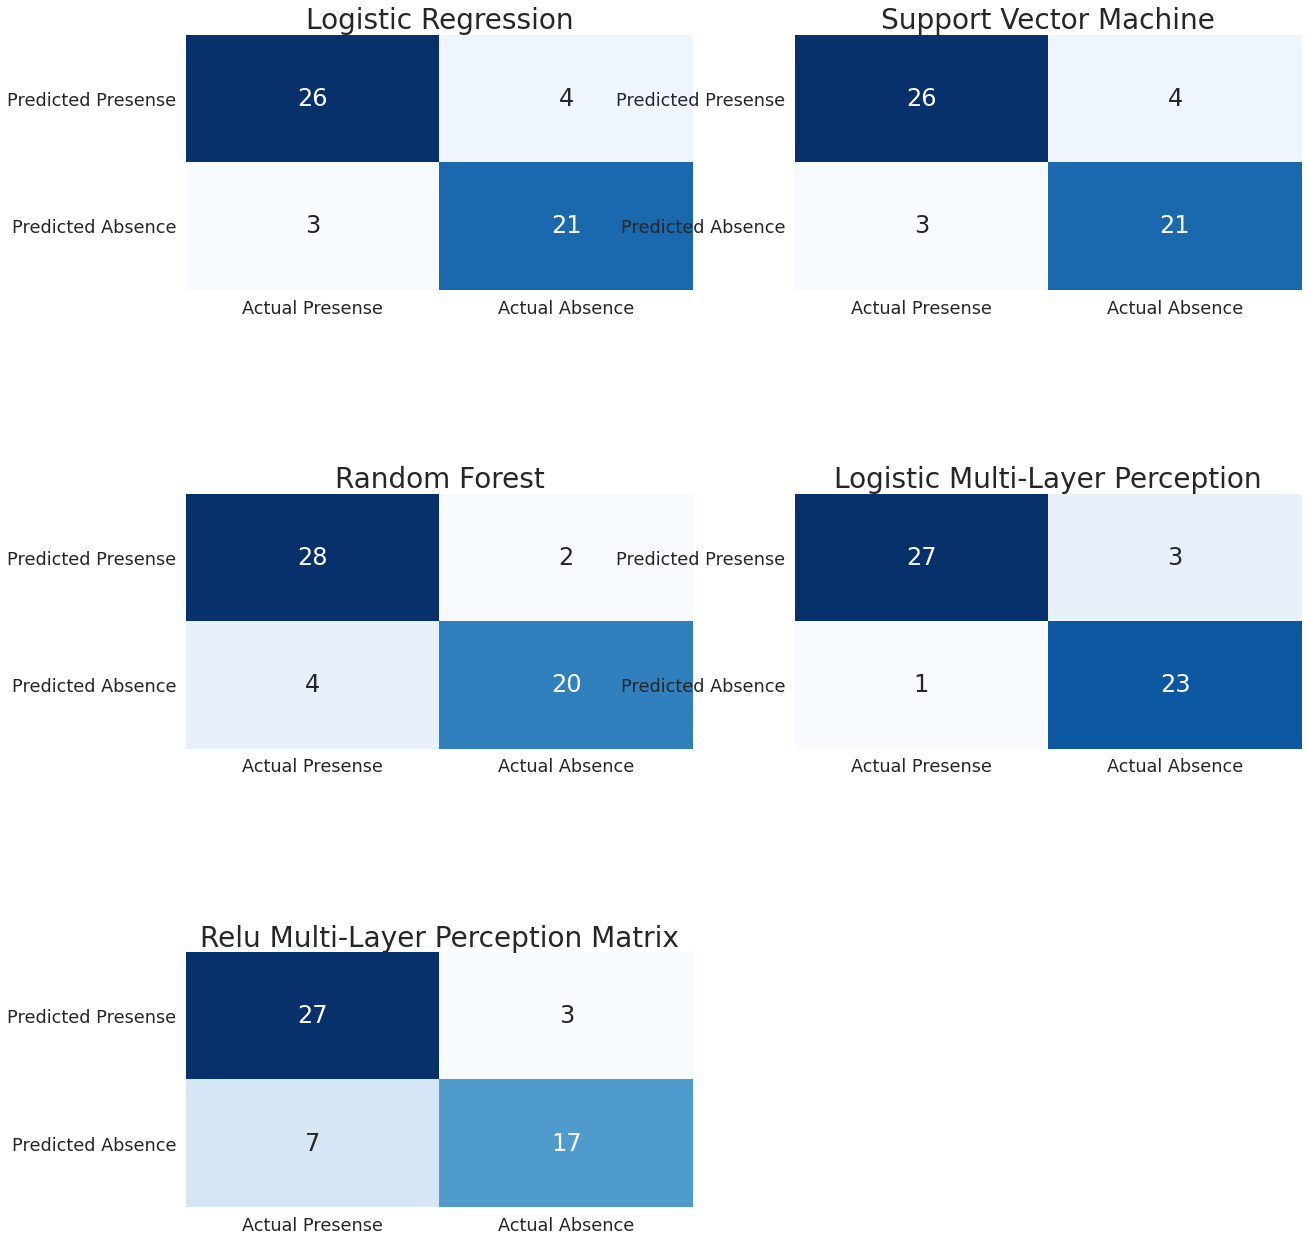

In [351]:
plt.figure(figsize=(20,30))
sns.set(font_scale=1.6)
plt.subplots_adjust(hspace = 0.8)

#LR
plt.subplot(4,2,1)
plt.title("Logistic Regression", fontsize=28)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#SVM
plt.subplot(4,2,2)
plt.title("Support Vector Machine", fontsize=28)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#RF
plt.subplot(4,2,3)
plt.title("Random Forest", fontsize=28)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#LR
plt.subplot(4,2,4)
plt.title("Logistic Multi-Layer Perception", fontsize=28)
sns.heatmap(cm_mlp,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#SVM
plt.subplot(4,2,5)
plt.title("Relu Multi-Layer Perception Matrix", fontsize=28)
sns.heatmap(cm_mlpr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

plt.savefig('class_cm.jpg')
plt.show()

# ROC Curve

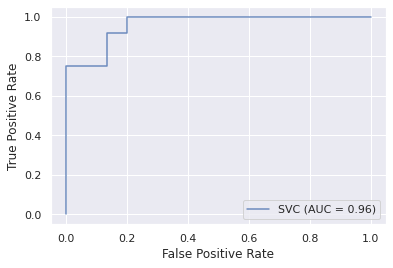

In [352]:
from sklearn.metrics import plot_roc_curve
sns.set(font_scale=1)
svm_disp = plot_roc_curve(svm, x_test, y_test, alpha=0.8)

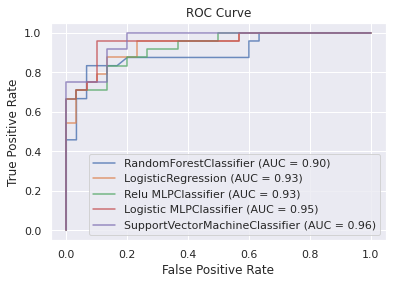

In [353]:
ax = plt.gca()
rf_disp = plot_roc_curve(rf, x_validation, y_validation, ax=ax, alpha=0.8)
lr_disp = plot_roc_curve(lr, x_validation, y_validation, ax=ax, alpha=0.8)
mlpr_disp = plot_roc_curve(mlpr, x_validation, y_validation, ax=ax, alpha=0.8, name='Relu MLPClassifier')
mlp_disp = plot_roc_curve(mlp, x_validation, y_validation, ax=ax, alpha=0.8, name='Logistic MLPClassifier')
svm_disp.plot(ax=ax, alpha=0.8, name='SupportVectorMachineClassifier')
plt.title('ROC Curve')
plt.show()

# **Feature Analysis**

*Permutation Importance*

In [120]:
!pip install eli5
!pip install shap

In [121]:
import eli5
from eli5.sklearn import PermutationImportance

# Logistic Regression
perm = PermutationImportance(lr, random_state=1).fit(x_validation, y_validation)
eli5.show_weights(perm, feature_names = x_validation.columns.tolist())

Weight,Feature
0.0333 ± 0.0277,thal_7.0
0.0296 ± 0.0444,exang
0.0296 ± 0.0502,cp_4
0.0259 ± 0.0296,ca
0.0222 ± 0.0432,sex
0.0185 ± 0.0000,cp_1
0.0185 ± 0.0000,slope_2
0.0148 ± 0.0363,thal_3.0
0.0111 ± 0.0181,famhist
0.0074 ± 0.0181,restecg_0


In [370]:
# Support Vector Machine
perm = PermutationImportance(svm, random_state=1).fit(x_validation, y_validation)
eli5.show_weights(perm, feature_names = x_validation.columns.tolist())

Weight,Feature
0.0519 ± 0.0432,exang
0.0481 ± 0.0296,cp_4
0.0296 ± 0.0296,thal_7.0
0.0296 ± 0.0181,thal_3.0
0.0259 ± 0.0296,slope_2
0.0222 ± 0.0363,years
0.0185 ± 0.0663,ca
0.0185 ± 0.0406,thalach
0.0185 ± 0.0234,cp_1
0.0148 ± 0.0363,trestbps


In [369]:
# Random Forest
perm = PermutationImportance(rf, random_state=1).fit(x_validation, y_validation)
eli5.show_weights(perm, feature_names = x_validation.columns.tolist())

Weight,Feature
0.0852 ± 0.0602,ca
0.0667 ± 0.0502,thal_7.0
0.0519 ± 0.0544,thalach
0.0519 ± 0.0363,trestbps
0.0407 ± 0.0432,oldpeak
0.0370 ± 0.0663,exang
0.0370 ± 0.0234,chol
0.0370 ± 0.0331,cp_4
0.0296 ± 0.0502,thal_3.0
0.0296 ± 0.0378,tpeakbps


*shap*

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


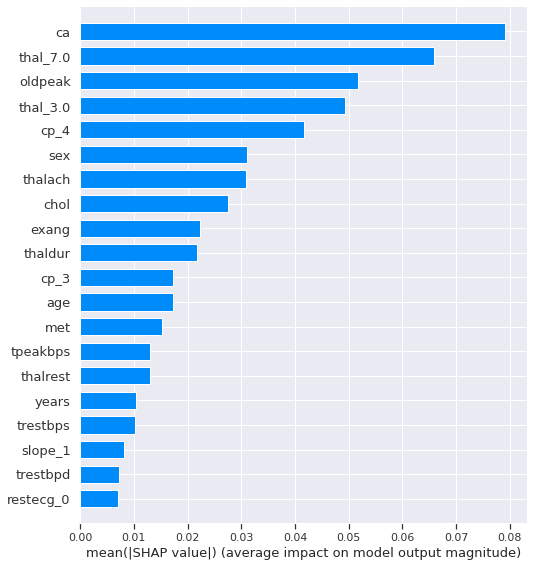

In [371]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_validation)

shap.summary_plot(shap_values[1], x_validation, plot_type="bar")

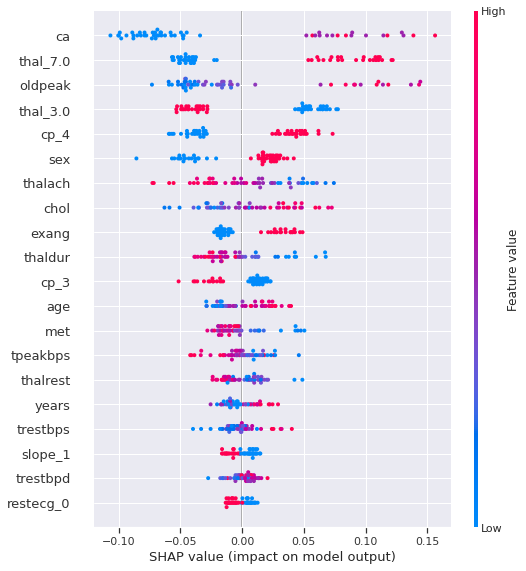

In [374]:
shap.summary_plot(shap_values[1], x_validation)

In [0]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [375]:
data_for_prediction = x_validation.iloc[1,:].astype(float)
heart_disease_risk_factors(rf, data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


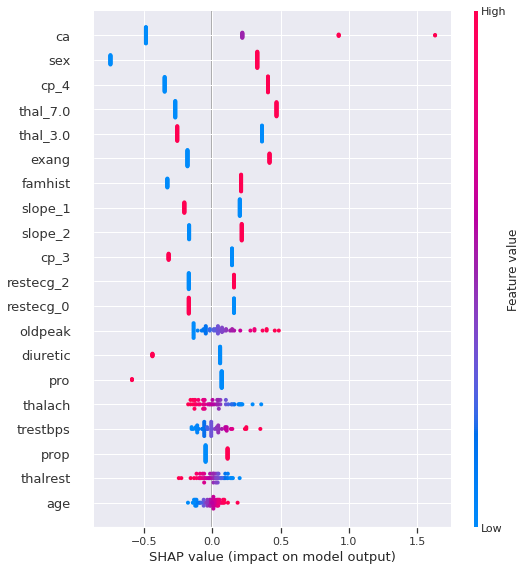

In [376]:
explainer = shap.LinearExplainer(lr, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_validation)
shap.summary_plot(shap_values, x_validation)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


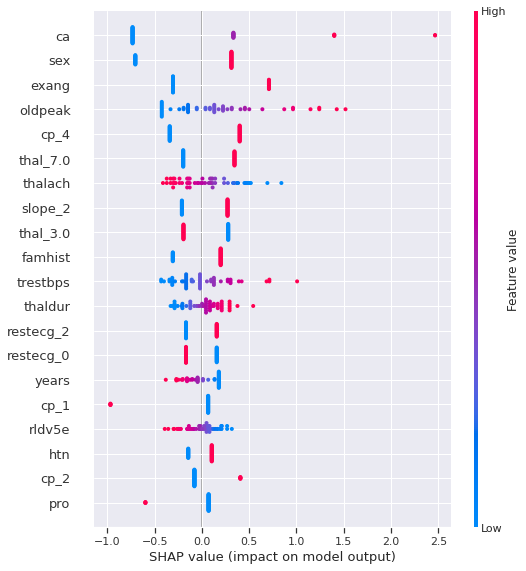

In [377]:
explainer = shap.LinearExplainer(svm, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_validation)
shap.summary_plot(shap_values, x_validation)

# *Result Analysis*

In [354]:
sorted(time_proc.items(), key=lambda x: x[1])

[('SVM', 0.010332062999623304),
 ('LR', 0.014514261999465816),
 ('MLP', 0.10204577799959225),
 ('RF', 0.11041664500226034),
 ('MLPR', 0.8047068380001292)]

In [355]:
sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

[('MLP', 92.5925925925926),
 ('RF', 88.88888888888889),
 ('LR', 87.03703703703704),
 ('SVM', 87.03703703703704),
 ('MLPR', 81.48148148148148)]

In [356]:
sorted(accuracies_train.items(), key=lambda x: x[1], reverse=True)

[('RF', 100.0),
 ('MLPR', 98.4126984126984),
 ('MLP', 95.76719576719577),
 ('SVM', 91.005291005291),
 ('LR', 87.3015873015873)]

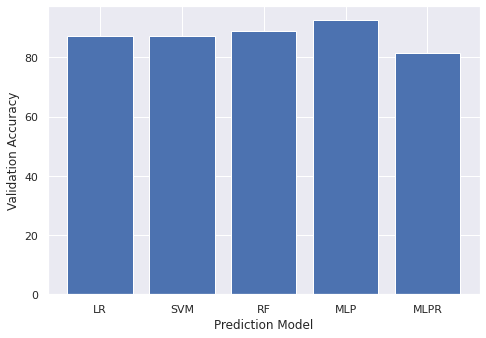

In [357]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_names = ['LR', 'SVM', 'RF', 'MLP', 'MLPR']
model_acc = [accuracies['LR'], accuracies['SVM'], accuracies['RF'], accuracies['MLP'], accuracies['MLPR']]
ax.bar(model_names,model_acc)
plt.xlabel('Prediction Model')
plt.ylabel('Validation Accuracy')
plt.show()

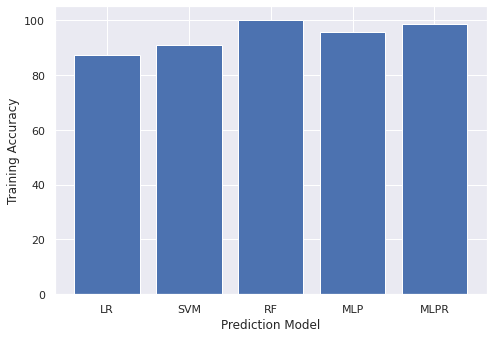

In [358]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_names = ['LR', 'SVM', 'RF', 'MLP', 'MLPR']
model_acc = [accuracies_train['LR'], accuracies_train['SVM'], accuracies_train['RF'], accuracies_train['MLP'], accuracies_train['MLPR']]
ax.bar(model_names,model_acc)
plt.xlabel('Prediction Model')
plt.ylabel('Training Accuracy')
plt.show()

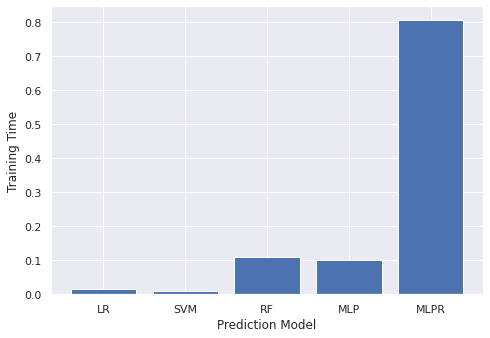

In [359]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_names = ['LR', 'SVM', 'RF', 'MLP', 'MLPR']
model_time = [time_proc['LR'], time_proc['SVM'], time_proc['RF'], time_proc['MLP'], time_proc['MLPR']]
ax.bar(model_names,model_time)
plt.xlabel('Prediction Model')
plt.ylabel('Training Time')
plt.show()

In [0]:
dfPerformance = pd.DataFrame(sensitivity_spTable, columns = ['Model' , 'Accuracy', 'Sensitivity', 'Specificity']) 

In [362]:
dfPerformance

,Model,Accuracy,Sensitivity,Specificity
0,LR,87.037037,89.655172,84.000000
1,SVM,87.037037,89.655172,84.000000
2,RF,88.888889,87.500000,90.909091
3,MLP,92.592593,96.428571,88.461538
4,MLPR,81.481481,79.411765,85.000000


In [363]:
accuracies_test = {}

acc = lr.score(x_test,y_test)*100
accuracies_test['LR'] = acc
print("Test Accuracy of LR: {:.2f}%".format(acc))



acc = svm.score(x_test,y_test)*100
accuracies_test['SVM'] = acc
print("Test Accuracy of SVM: {:.2f}%".format(acc))

acc = rf.score(x_test,y_test)*100
accuracies_test['RF'] = acc
print("Test Accuracy of RF: {:.2f}%".format(acc))

acc = mlp.score(x_test,y_test)*100
accuracies_test['MLP'] = acc
print("Test Accuracy of Logistic Multi-Layer Perception: {:.2f}%".format(acc))

acc = mlpr.score(x_test,y_test)*100
accuracies_test['MLPR'] = acc
print("Test Accuracy of Relu Multi-Layer Perception: {:.2f}%".format(acc))

Test Accuracy of LR: 88.89%
Test Accuracy of SVM: 85.19%
Test Accuracy of RF: 81.48%
Test Accuracy of Logistic Multi-Layer Perception: 77.78%
Test Accuracy of Relu Multi-Layer Perception: 81.48%


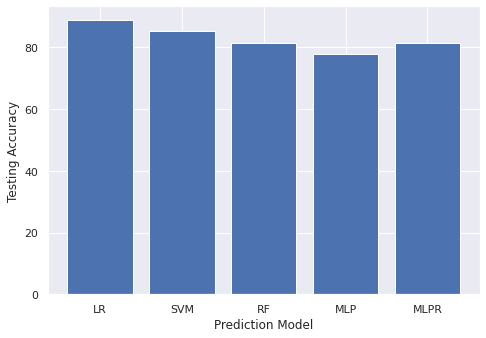

In [364]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_names = ['LR', 'SVM', 'RF', 'MLP', 'MLPR']
model_acc = [accuracies_test['LR'], accuracies_test['SVM'], accuracies_test['RF'], accuracies_test['MLP'], accuracies_test['MLPR']]
ax.bar(model_names,model_acc)
plt.xlabel('Prediction Model')
plt.ylabel('Testing Accuracy')
plt.show()

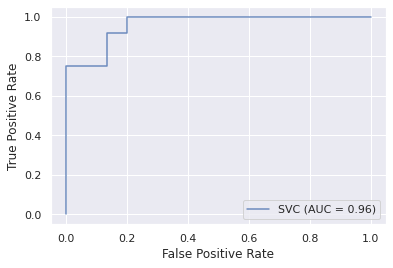

In [365]:
sns.set(font_scale=1)
svm_disp = plot_roc_curve(svm, x_test, y_test, alpha=0.8)

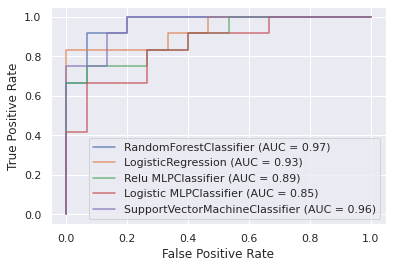

In [366]:
ax = plt.gca()
rf_disp = plot_roc_curve(rf, x_test, y_test, ax=ax, alpha=0.8)
lr_disp = plot_roc_curve(lr, x_test, y_test, ax=ax, alpha=0.8)
mlpr_disp = plot_roc_curve(mlpr, x_test, y_test, ax=ax, alpha=0.8, name='Relu MLPClassifier')
mlp_disp = plot_roc_curve(mlp, x_test, y_test, ax=ax, alpha=0.8, name='Logistic MLPClassifier')
svm_disp.plot(ax=ax, alpha=0.8, name='SupportVectorMachineClassifier')
plt.show()

In [367]:
from sklearn.metrics import confusion_matrix
sensitivity_spTable = []

# Logistic Regression
lr_predict = lr.predict(x_test)
lr_pred_quant = lr.predict_proba(x_test)[:, 1]
lr_pred_bin = lr.predict(x_test)

cm_lr = confusion_matrix(y_test,lr_pred_bin)
total=sum(sum(cm_lr))

print('For Logistic Regression:')
sensitivity = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[1,0])*100
specificity = cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['LR', accuracies_test['LR'], sensitivity, specificity])

# Support Vector Machine
svm_predict = svm.predict(x_test)
cm_svm = confusion_matrix(y_test,svm_predict)
total=sum(sum(cm_svm))

print('For Support Vector Machine:')
sensitivity = cm_svm[0,0]/(cm_svm[0,0]+cm_svm[1,0])*100
specificity = cm_svm[1,1]/(cm_svm[1,1]+cm_svm[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['SVM', accuracies_test['SVM'], sensitivity, specificity])

# Random Forest
y_predict = rf.predict(x_test)
y_pred_quant = rf.predict_proba(x_test)[:, 1]
y_pred_bin = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_bin)
total=sum(sum(cm_rf))

print('For Random Forest:')
sensitivity = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[1,0])*100
specificity = cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])*100
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['RF', accuracies_test['RF'], sensitivity, specificity])

y_predict = mlp.predict(x_test)
y_pred_quant = mlp.predict_proba(x_test)[:, 1]
y_pred_bin = mlp.predict(x_test)

cm_mlp = confusion_matrix(y_test, y_pred_bin)
total=sum(sum(cm_mlp))

sensitivity = cm_mlp[0,0]/(cm_mlp[0,0]+cm_mlp[1,0])*100
specificity = cm_mlp[1,1]/(cm_mlp[1,1]+cm_mlp[0,1])*100
print('For Logistic Multi-Layer Perception:')
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))
print('\n')

sensitivity_spTable.append(['MLP', accuracies_test['MLP'], sensitivity, specificity])

y_predict = mlpr.predict(x_test)
y_pred_quant = mlpr.predict_proba(x_test)[:, 1]
y_pred_bin = mlpr.predict(x_test)

cm_mlpr = confusion_matrix(y_test, y_pred_bin)
total=sum(sum(cm_mlpr))

sensitivity = cm_mlpr[0,0]/(cm_mlpr[0,0]+cm_mlpr[1,0])*100
specificity = cm_mlpr[1,1]/(cm_mlpr[1,1]+cm_mlpr[0,1])*100

print('For Relu Multi-Layer Perception:')
print('Sensitivity: {:.2f}%'.format(sensitivity))
print('Specificity: {:.2f}%'.format(specificity))

sensitivity_spTable.append(['MLPR', accuracies_test['MLPR'], sensitivity, specificity])

For Logistic Regression:
Sensitivity: 83.33%
Specificity: 100.00%


For Support Vector Machine:
Sensitivity: 78.95%
Specificity: 100.00%


For Random Forest:
Sensitivity: 77.78%
Specificity: 88.89%


For Logistic Multi-Layer Perception:
Sensitivity: 76.47%
Specificity: 80.00%


For Relu Multi-Layer Perception:
Sensitivity: 77.78%
Specificity: 88.89%


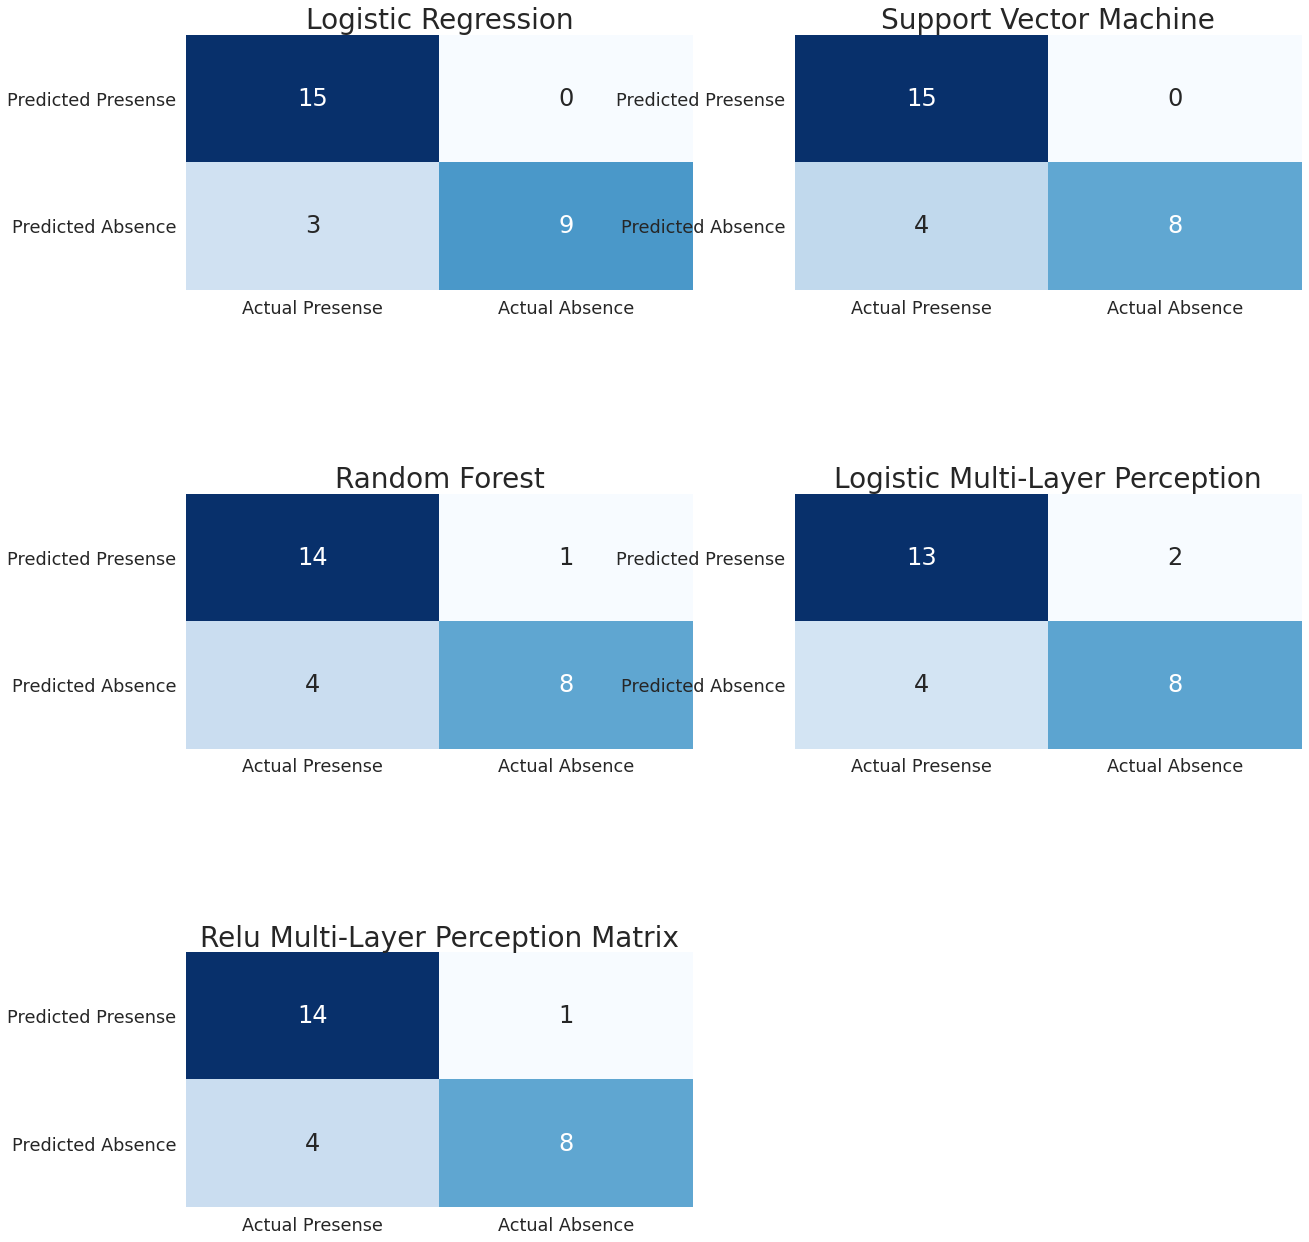

In [368]:
plt.figure(figsize=(20,30))
sns.set(font_scale=1.6)
plt.subplots_adjust(hspace = 0.8)

#LR
plt.subplot(4,2,1)
plt.title("Logistic Regression", fontsize=28)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#SVM
plt.subplot(4,2,2)
plt.title("Support Vector Machine", fontsize=28)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#RF
plt.subplot(4,2,3)
plt.title("Random Forest", fontsize=28)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#LR
plt.subplot(4,2,4)
plt.title("Logistic Multi-Layer Perception", fontsize=28)
sns.heatmap(cm_mlp,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

#SVM
plt.subplot(4,2,5)
plt.title("Relu Multi-Layer Perception Matrix", fontsize=28)
sns.heatmap(cm_mlpr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}, xticklabels=['Actual Presense', 'Actual Absence'], yticklabels=['Predicted Presense', 'Predicted Absence'])

plt.savefig('class_cm.jpg')
plt.show()